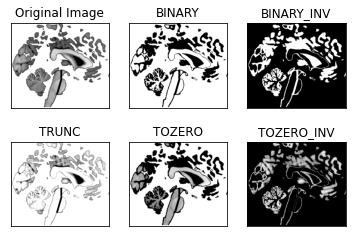

In [35]:
#二値画像によるしきい値処理
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/chol/Desktop/Practice.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [36]:
import cv2
import numpy as np
from IPython import display
from matplotlib import pyplot as plt


def imshow(img, format=".jpg", **kwargs):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    img = cv2.imencode(format, img)[1]
    img = display.Image(img, **kwargs)
    display.display(img)


def draw_contours(img, contours, ax):
    """輪郭の点及び線を画像上に描画する。
    """
    ax.imshow(img)
    ax.set_axis_off()

    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(plt.Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="r", size="20", bbox=dict(fc="w"))

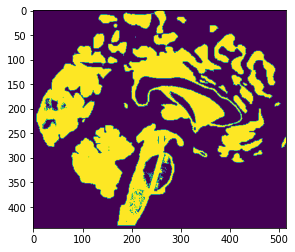

In [46]:
import cv2

im = cv2.imread('/Users/chol/Desktop/Practice.png',)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
retval, im_bw = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(im_bw)


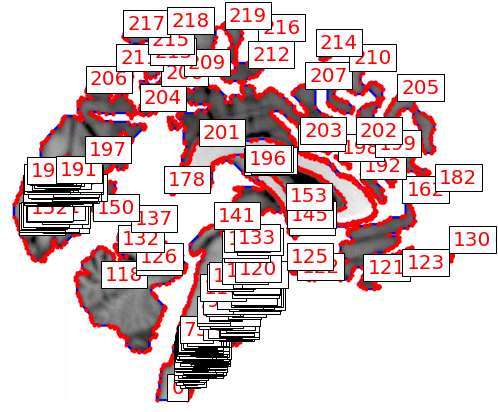

In [47]:
# 輪郭の検出
contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(img, contours, ax)
plt.show()

In [45]:
for i, cnt in enumerate(contours):
    # 輪郭の面積を計算する。
    area = cv2.contourArea(cnt)
    print(f"contour: {i}, area: {area}")

contour: 0, area: 2.0
contour: 1, area: 2.0
contour: 2, area: 2.0
contour: 3, area: 6.0
contour: 4, area: 6.0
contour: 5, area: 2.0
contour: 6, area: 5.5
contour: 7, area: 2.0
contour: 8, area: 2.0
contour: 9, area: 5.5
contour: 10, area: 2.0
contour: 11, area: 36.5
contour: 12, area: 2.0
contour: 13, area: 2.0
contour: 14, area: 5.5
contour: 15, area: 2.0
contour: 16, area: 4.0
contour: 17, area: 2.0
contour: 18, area: 2.0
contour: 19, area: 2.0
contour: 20, area: 2.0
contour: 21, area: 8.5
contour: 22, area: 4.0
contour: 23, area: 2.0
contour: 24, area: 4.0
contour: 25, area: 8.5
contour: 26, area: 4.0
contour: 27, area: 2.0
contour: 28, area: 2.0
contour: 29, area: 4.0
contour: 30, area: 4.0
contour: 31, area: 2.0
contour: 32, area: 2.0
contour: 33, area: 5.5
contour: 34, area: 2.0
contour: 35, area: 2.0
contour: 36, area: 2.0
contour: 37, area: 2.0
contour: 38, area: 2.0
contour: 39, area: 4.0
contour: 40, area: 2.0
contour: 41, area: 2.0
contour: 42, area: 4.0
contour: 43, area: 5

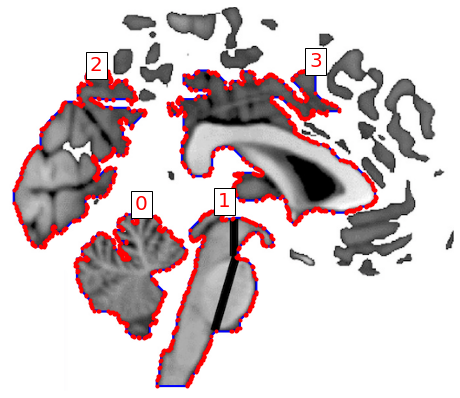

In [61]:
contours2 = list(filter(lambda x: cv2.contourArea(x) >= 10000, contours))
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(img, contours2, ax)
plt.show()

In [63]:
for i, cnt in enumerate(contours2):
    # 輪郭の面積を計算する。
    area = cv2.contourArea(cnt)
    #周囲長も測る？
    perimeter = cv2.arcLength(cnt,True)
    print(f"contour: {i}, area: {area}, perimeter: {perimeter},")

contour: 0, area: 10565.5, perimeter: 654.8843367099762,
contour: 1, area: 12138.0, perimeter: 697.3279877901077,
contour: 2, area: 15066.0, perimeter: 920.4061952829361,
contour: 3, area: 22053.5, perimeter: 1307.6681691408157,


In [73]:
out = np.zeros_like(img)
cv2.drawContours(out, [contours[1]], -1, color=255, thickness=-1)
cv2.imwrite("ret.png", out)

True